In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate a sample time series (e.g., a sine wave with noise)
time = np.arange(0, 10, 0.1)
frequency1 = 1
frequency2 = 3
signal = np.sin(2 * np.pi * frequency1 * time) + 0.5 * np.sin(2 * np.pi * frequency2 * time) + np.random.normal(0, 0.5, len(time))

In [11]:
# Perform Fourier Transformation
fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(signal.size, d=time[1]-time[0])

# Only keep the positive half of frequencies
positive_mask = frequencies > 0
fft = np.abs(fft[positive_mask])
frequencies = frequencies[positive_mask]

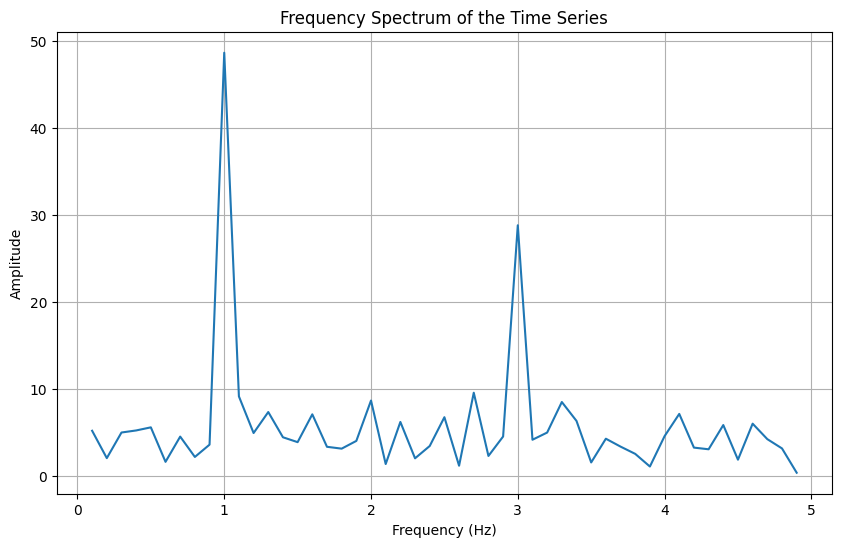

In [13]:
import pandas as pd
df = pd.DataFrame({'Frequency': frequencies, 'Amplitude': np.abs(fft)})

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(df.Frequency, df.Amplitude)
plt.xlabel("Frequency (Hz)")
plt.xticks(np.arange(0, 6, 1))
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum of the Time Series")
plt.grid(True)
plt.show()

#Stock

In [15]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


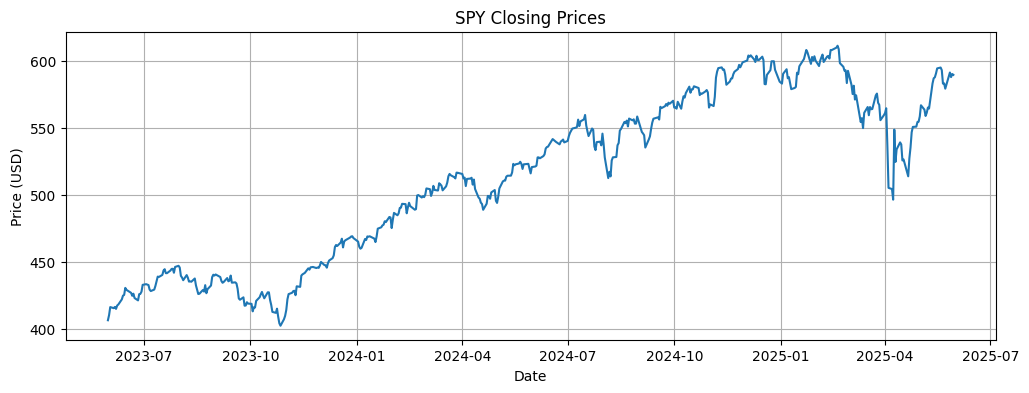

In [74]:
# Load daily stock prices for Apple (AAPL) over the last 2 years
data = yf.download("SPY", period="2y")
close_prices = data['Close'].values
dates = data.index
n = len(close_prices)

# Plot the original closing prices
plt.figure(figsize=(12, 4))
plt.plot(dates, close_prices)
plt.title("SPY Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


In [75]:
from scipy.signal import detrend

# Remove linear trend
detrended = detrend(close_prices)

In [76]:
# Apply FFT
fft_vals = np.fft.fft(detrended)
fft_freq = np.fft.fftfreq(n, d=1)  # d=1 for daily intervals

# Focus on positive frequencies only
pos_mask = fft_freq > 0
fft_vals = np.abs(fft_vals[pos_mask])
fft_freq = fft_freq[pos_mask]


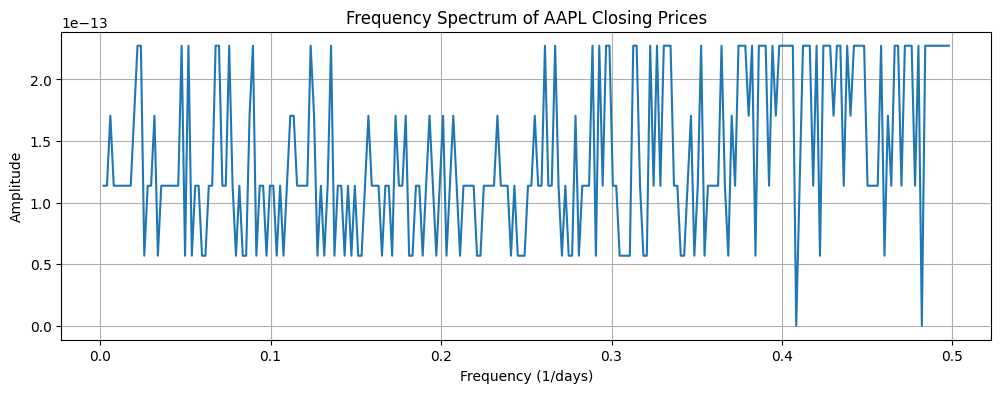

In [77]:
plt.figure(figsize=(12, 4))
plt.plot(fft_freq, fft_vals)
plt.title("Frequency Spectrum of AAPL Closing Prices")
plt.xlabel("Frequency (1/days)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [78]:
# Get index of the top 3 frequencies
top_idx = np.argsort(fft_vals.flatten())[-3:][::-1]
top_freqs = fft_freq[top_idx]
top_cycles = 1 / top_freqs

print("Dominant cycle lengths (in days):", top_cycles)

Dominant cycle lengths (in days): [2.008      2.01606426 2.02419355]
